## scikit-allel with syn3 dataset

[`scikit-allel`](http://scikit-allel.readthedocs.org/en/latest/) is a Python library for exploratory analysis of large-scale genome variation data.

The syn3 VCF dataset comes from the ICGC-TCGA DREAM challenge processed via the bcbio cancer pipeline.

In [1]:
import numpy as np
import allel
import matplotlib.pyplot as plt
import h5py
import seaborn as sns
import vcfnp
sns.set_style('white')
sns.set_style('ticks')
%matplotlib inline

/Users/romanvg/.anaconda/envs/py3/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
syn3_vcf = 'syn3-ensemble.vcf.gz'
v = vcfnp.variants(syn3_vcf, cache=True).view(np.recarray)

[vcfnp] 2015-11-29 15:07:53.998383 :: caching is enabled
[vcfnp] 2015-11-29 15:07:53.999642 :: cache file available
[vcfnp] 2015-11-29 15:07:54.000092 :: loading from cache file syn3-ensemble.vcf.gz.vcfnp_cache/variants.npy


In [5]:
# pick a chromosome to work with
chrom = '6'

In [6]:
syn3_pos = allel.SortedIndex(sorted(v['POS'][:]))
syn3_pos

SortedIndex((1141,), dtype=int32)
[    49147    334919    658019 ..., 241622499 241712027 242524186]

Let's plot the density of these variants over the chromosome.

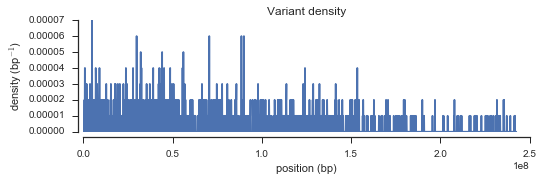

In [8]:
bin_width = 100000
bins = np.arange(0, syn3_pos.max(), bin_width)

# set X coordinate as bin midpoints
x = (bins[1:] + bins[:-1])/2

# compute variant density
h, _ = np.histogram(syn3_pos, bins=bins)
y = h / bin_width

# plot
fig, ax = plt.subplots(figsize=(8, 2))
sns.despine(ax=ax, offset=5)
ax.plot(x, y)
ax.set_xlabel('position (bp)')
ax.set_ylabel('density (bp$^{-1}$)')
ax.set_title('Variant density');

Let's say I have a gene of interest. I know what position it starts and ends, and I want to find variants within the gene.

In [9]:
start, stop = 2358158, 2431617
loc = syn3_pos.locate_range(start, stop)
loc

slice(34, 35, None)